# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [55]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [56]:
# Add any additional import statements you need here
import warnings
import matplotlib.pyplot as plt

In [57]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/clairebentzen/Desktop/MDAS/ADS 509 - Applied Text Mining/Module 2/Assignment2.1/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [58]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # Print the five most common tokens
        top_five = Counter(tokens).most_common(5)
        print(top_five)
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [59]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in your code to ensure that certain conditions are met before continuing on in the code. For example, if a certain value is expected, an assertion statement can be used to check that the expected value is met before anything else is performed.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [60]:
# Read in the lyrics data
# Specify pathway to lyrics folder
lyrics_path = data_location + lyrics_folder

# Create a dataframe to store results
lyrics_df = pd.DataFrame(columns=['artist', 'song', 'lyrics'])

# Iterate through each file in the lyrics folder
for artist in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist)
    
    # Iterate through each file in the artist folders
    for song in os.listdir(artist_path):
        song_path = os.path.join(artist_path, song)
        rem_prefix = song.removeprefix(f'{artist}_')
        song_title = rem_prefix.removesuffix('.txt')

        # Open and read the contents of the file (song)
        with open(song_path, 'r') as file:
            contents = file.read()
            # Prepare data to add to dataframe
            data = {'artist': artist, 'song': song_title, 'lyrics': contents}
            # The df.append() function is deprecated, so we will ignore warnings here
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                # Append row of data to lyrics_df
                lyrics_df = lyrics_df.append(data, ignore_index=True)
                
# Print first 5 records
lyrics_df.head()

,artist,song,lyrics
0,robyn,includemeout,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn,electric,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn,beach2k20,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn,lovekills,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn,timemachine,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."


In [61]:
# Read in the twitter data
# Specify pathway to twitter folder
twitter_path = data_location + twitter_folder

# Create a dataframe to store results
twitter_df = pd.DataFrame(columns=['artist', 'description'])

# Iterate through each file in the twitter folder where file name ends in _data.txt
for file_name in os.listdir(twitter_path):
    if file_name.endswith('_data.txt'):
        file_path = os.path.join(twitter_path, file_name)
        # Read tab delimited file
        temp_df = pd.read_csv(file_path, delimiter = '\t', on_bad_lines='skip')
        
        # Save artist name as the string prior to the first _
        artist_name = file_name.split('_', 1)[0]
        # Add artist as a column
        temp_df['artist'] = artist_name
        
        # Subset only the artist and description columns
        temp_df = temp_df[['artist', 'description']]
        
        # Append new columns to twitter_df
        twitter_df = pd.concat([twitter_df, temp_df], ignore_index=True)
        
# Print first 5 records
twitter_df.head()

,artist,description
0,cher,NaN
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,csu
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [62]:
punctuation = set(punctuation) # speeds up comparison

In [63]:
# Data Cleaning Function
def data_cleaning(text):
    # Convert text to string
    text = str(text)
    
    # Fold to lowercase
    fold_lower = text.lower()
    
    # Remove punctuation
    remove_punctuation = ''.join(char for char in fold_lower if char not in punctuation)
    
    # Split on whitespace
    split = remove_punctuation.split()
    
    # Remove stopwords
    clean_text = [word for word in split if word not in sw]
    
    return ' '.join(clean_text)

In [64]:
# Clean twitter data
twitter_df['cleaned_description'] = twitter_df['description'].apply(data_cleaning)

# Replace robyn for continuity
twitter_df['artist'] = twitter_df['artist'].replace('robynkonichiwa', 'robyn')

In [65]:
# Clean lyric data
lyrics_df['cleaned_lyrics'] = lyrics_df['lyrics'].apply(data_cleaning)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [66]:
# Cher Lyrics Stats
# Subset cher lyrics
cher_lyrics = lyrics_df[lyrics_df['artist'] == 'cher']
# Concat cleaned lyrics into one string
cher_lyrics_str = cher_lyrics['cleaned_lyrics'].str.cat(sep=' ')

# Calculate descriptive stats
cher_lyrics_desc = descriptive_stats(cher_lyrics_str.split())
cher_lyrics_desc

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
[('love', 1004), ('im', 513), ('know', 486), ('dont', 440), ('youre', 333)]


[35916, 3703, 0.10310168170174852, 172634]

In [67]:
# Robyn Lyrics Stats
# Subset robyn lyrics
robyn_lyrics = lyrics_df[lyrics_df['artist'] == 'robyn']
# Concat cleaned lyrics into one string
robyn_lyrics_str = robyn_lyrics['cleaned_lyrics'].str.cat(sep=' ')

# Calculate descriptive stats
robyn_lyrics_desc = descriptive_stats(robyn_lyrics_str.split())
robyn_lyrics_desc

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
[('know', 308), ('dont', 301), ('im', 299), ('love', 275), ('got', 251)]


[15227, 2156, 0.14159059565245943, 73787]

In [68]:
# Cher Twitter Stats
# Subset cher twitter data
cher_twitter = twitter_df[twitter_df['artist'] == 'cher']
# Concat descriptions into one string
cher_twitter_str = cher_twitter['cleaned_description'].str.cat(sep=' ')

# Calculate descriptive stats
cher_twitter_desc = descriptive_stats(cher_twitter_str.split())
cher_twitter_desc

There are 18102661 tokens in the data.
There are 1697994 unique tokens in the data.
There are 101904931 characters in the data.
The lexical diversity is 0.094 in the data.
[('nan', 1953916), ('love', 214529), ('im', 139037), ('life', 122900), ('music', 88168)]


[18102661, 1697994, 0.09379803333885554, 101904931]

In [69]:
# Robyn Twitter Stats
# Subset robyn twitter data
robyn_twitter = twitter_df[twitter_df['artist'] == 'robyn']
# Concat descriptions into one string
robyn_twitter_str = robyn_twitter['cleaned_description'].str.cat(sep=' ')

# Calculate descriptive stats
robyn_twitter_desc = descriptive_stats(robyn_twitter_str.split())
robyn_twitter_desc

There are 1703000 tokens in the data.
There are 271325 unique tokens in the data.
There are 9891691 characters in the data.
The lexical diversity is 0.159 in the data.
[('nan', 164845), ('music', 15160), ('love', 11683), ('im', 9052), ('och', 7922)]


[1703000, 271325, 0.15932178508514386, 9891691]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data, the top 5 words would have been more general, undescriptive words like I, the, and, so, etc. They would not have been able to identify the more meaningful words like love, music, and life as the top words if stopwords were present.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Prior to this assignment, I was not familar with Robyn as an artist, but I knew of Cher's songs. Based on the fact that the artists make music in a similar genre, I would assume that their lexical diversities would be similar. This assignment confirmed that their lexical diversities are pretty similar at around 0.1.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [70]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [71]:
# Cher Twitter Emojis

# Find emojis in string
emojis = [char for char in cher_twitter_str if emoji.is_emoji(char)]

# Get counts for each emoji
emoji_counts = Counter(emojis).most_common(10)

# 10 most common
print(emoji_counts)

[('❤', 79373), ('🌈', 47795), ('♥', 34239), ('🏳', 33591), ('✨', 29715), ('💙', 21498), ('🏻', 20970), ('🌊', 20319), ('✌', 16876), ('💜', 16607)]


In [72]:
# Robyn Twitter Emojis

# Find emojis in string
emojis = [char for char in robyn_twitter_str if emoji.is_emoji(char)]

# Get counts for each emoji
emoji_counts = Counter(emojis).most_common(10)

# 10 most common
print(emoji_counts)

[('❤', 4808), ('🌈', 4702), ('🏳', 3539), ('♥', 3117), ('✨', 2240), ('🏻', 1498), ('✌', 1194), ('🏼', 1145), ('♀', 848), ('💙', 818)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [73]:
# Remove hashtags from punctuation
punctuation.discard('#')

In [74]:
# Data Cleaning Function w/ keeping hashtags
def data_cleaning_hashtag(text):
    text = str(text)
    
    # Fold to lowercase
    fold_lower = text.lower()
    
    # Remove punctuation
    remove_punctuation = ''.join(char for char in fold_lower if char not in punctuation)
    
    # Split on whitespace
    split = remove_punctuation.split()
    
    
    # Remove stopwords
    clean_text = [word for word in split if word not in sw]
    
    return ' '.join(clean_text)

In [75]:
# Clean twitter data with new cleaning function
twitter_df['cleaned_description_#'] = twitter_df['description'].apply(data_cleaning_hashtag)

In [76]:
# Cher Twitter Hashtags

# Subset cher twitter data
cher_twitter = twitter_df[twitter_df['artist'] == 'cher']
# Concat descriptions into one string
cher_twitter_str = cher_twitter['cleaned_description_#'].str.cat(sep=' ')

# Find hashtags in string
hashtags = [word for word in cher_twitter_str.split() if word.startswith('#')]

# Get counts for each hashtag
hashtag_counts = Counter(hashtags).most_common(10)

# 10 most common
print(hashtag_counts)

[('#resist', 10530), ('#blm', 9579), ('#blacklivesmatter', 7768), ('#theresistance', 3209), ('#fbr', 3129), ('#resistance', 2784), ('#1', 2424), ('#', 2139), ('#voteblue', 2060), ('#lgbtq', 1789)]


In [77]:
# Robyn Twitter Hashtags

# Subset robyn twitter data
robyn_twitter = twitter_df[twitter_df['artist'] == 'robyn']
# Concat descriptions into one string
robyn_twitter_str = robyn_twitter['cleaned_description_#'].str.cat(sep=' ')

# Find hashtags in string
hashtags = [word for word in robyn_twitter_str.split() if word.startswith('#')]

# Get counts for each hashtag
hashtag_counts = Counter(hashtags).most_common(10)

# 10 most common
print(hashtag_counts)

[('#blacklivesmatter', 584), ('#blm', 341), ('#music', 289), ('#1', 194), ('#', 169), ('#teamfollowback', 127), ('#edm', 108), ('#lgbtq', 81), ('#resist', 80), ('#art', 69)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [78]:
# Function to get the song title and clean up the text
def get_title(text):
   
    # Song title is found before the first \n
    song_title = text.split('\n')[0]
    
    # Fold to lowercase
    song_title = song_title.lower()
    
    # Remove punctuation
    song_title = ''.join(char for char in song_title if char not in punctuation)
            
    return song_title

In [79]:
# Cher Song Titles
cher_lyrics['song_split'] = cher_lyrics['lyrics'].apply(get_title)

# Combine song titles into one string
cher_titles_str = cher_lyrics['song_split'].str.cat(sep=' ') 

# Get to 10 most common words in song titles
cher_song_title_count = Counter(cher_titles_str.split()).most_common(10)
cher_song_title_count

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_88932/2508315964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cher_lyrics['song_split'] = cher_lyrics['lyrics'].apply(get_title)


[('the', 54),
 ('you', 41),
 ('love', 38),
 ('i', 32),
 ('to', 28),
 ('a', 26),
 ('me', 25),
 ('of', 21),
 ('in', 14),
 ('and', 13)]

In [80]:
# Robyn Song Titles
robyn_lyrics['song_split'] = robyn_lyrics['lyrics'].apply(get_title)

# Combine song titles into one string
robyn_titles_str = robyn_lyrics['song_split'].str.cat(sep=' ') 

# Get to 10 most common words in song titles
robyn_song_title_count = Counter(robyn_titles_str.split()).most_common(10)
robyn_song_title_count

/var/folders/bj/4_046k_n1259zwtr2hcbxcbw0000gn/T/ipykernel_88932/3805967890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robyn_lyrics['song_split'] = robyn_lyrics['lyrics'].apply(get_title)


[('me', 11),
 ('you', 8),
 ('the', 8),
 ('my', 8),
 ('love', 6),
 ('to', 6),
 ('do', 5),
 ('should', 4),
 ('dont', 4),
 ('with', 4)]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

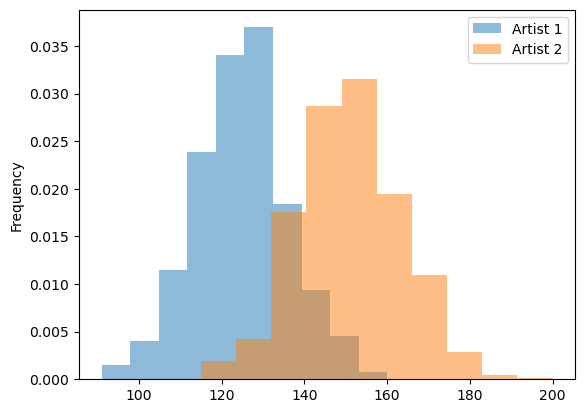

In [81]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression \s+ will match on any amount of whitespace. \s gives any whitespace character and + matches the character (whitespace in this case) one or more times.

In [82]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [83]:
# Tokenize lyrics
lyrics_df['tokenized'] = lyrics_df['cleaned_lyrics'].apply(tokenize_lyrics)

# Get length (number of tokens)
lyrics_df['length'] = lyrics_df['tokenized'].apply(len)

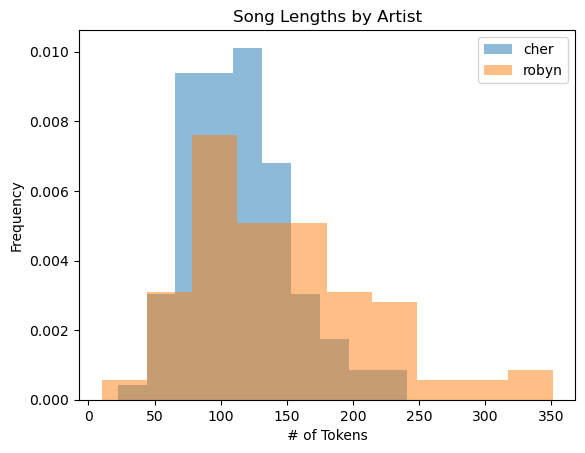

In [84]:
# Plot song length comparison
lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

plt.title('Song Lengths by Artist')
plt.xlabel('# of Tokens')
plt.show()